In [ ]:
!mkdir datasets
%cd datasets
!pip install --upgrade pillow
!pip install ultralytics --quiet
!pip install roboflow --quiet

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="yG44Wj536Zq32qm1kv7o")
project = rf.workspace("kumaraguru-college-of-technology-gfdmc").project("nested-object-detection")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.145, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Nested-Object-Detection-5 in yolov8:: 100%|██████████| 1735/1735 [00:00<00:00, 1834.58it/s]


In [5]:
from ultralytics import YOLO
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# Train the model
model.train(data="/content/datasets/Nested-Object-Detection-5/data.yaml", epochs=100, imgsz=640,optimizer = "Adam", verbose = True)

In [ ]:
model = YOLO('/content/datasets/datasets/runs/detect/train/weights/best.pt')  # load a custom model
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/datasets/Nested-Object-Detection-5/valid/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]
                   all        119        223      0.891      0.896      0.912      0.679
            Motorcycle        119        181      0.905      0.945      0.959      0.812
            Pedestrian        119         42      0.877      0.848      0.866      0.546
Speed: 4.3ms preprocess, 8.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


array([    0.81219,     0.54595])

In [ ]:
img = "/content/Test3.png"
res = model.predict(img, save=True, conf=0.5)


image 1/1 /content/Test3.png: 640x640 1 Motorcycle, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


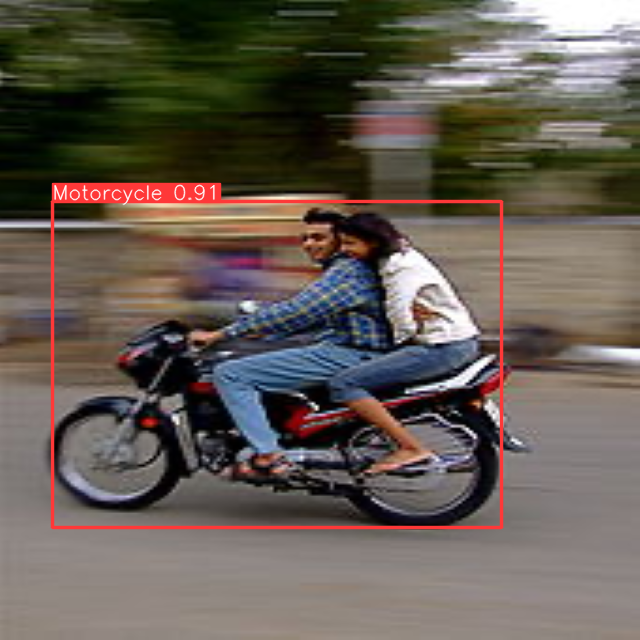

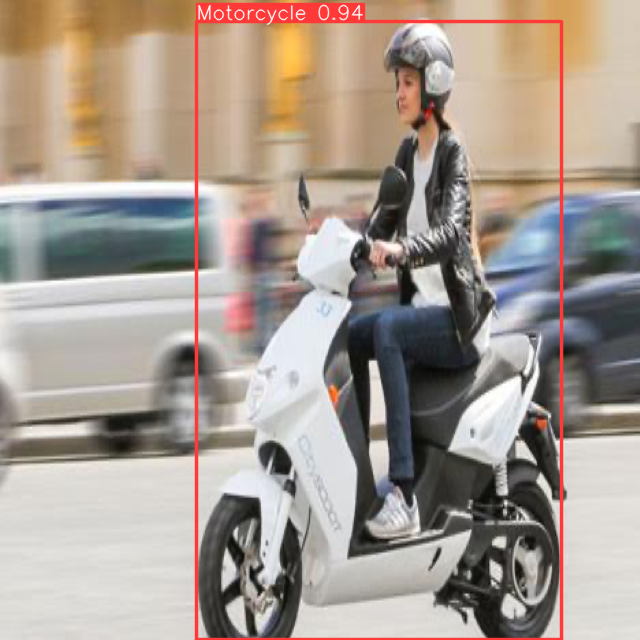

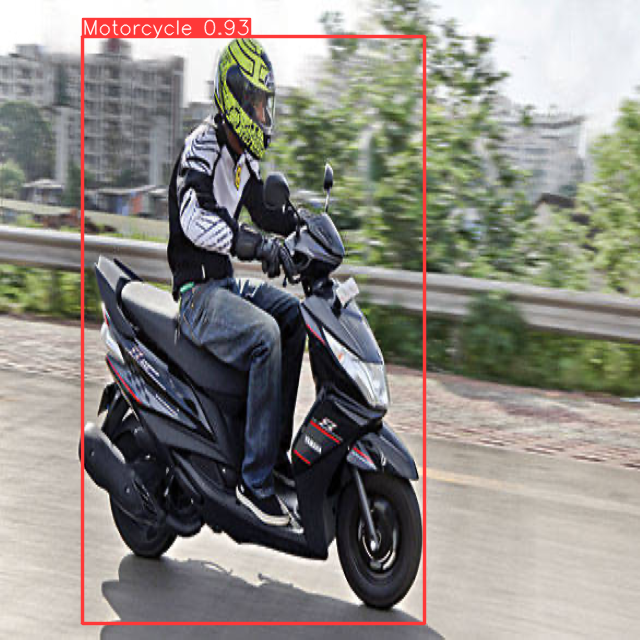

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/datasets/datasets/runs/detect/predict/*.png')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")
      print("\n")

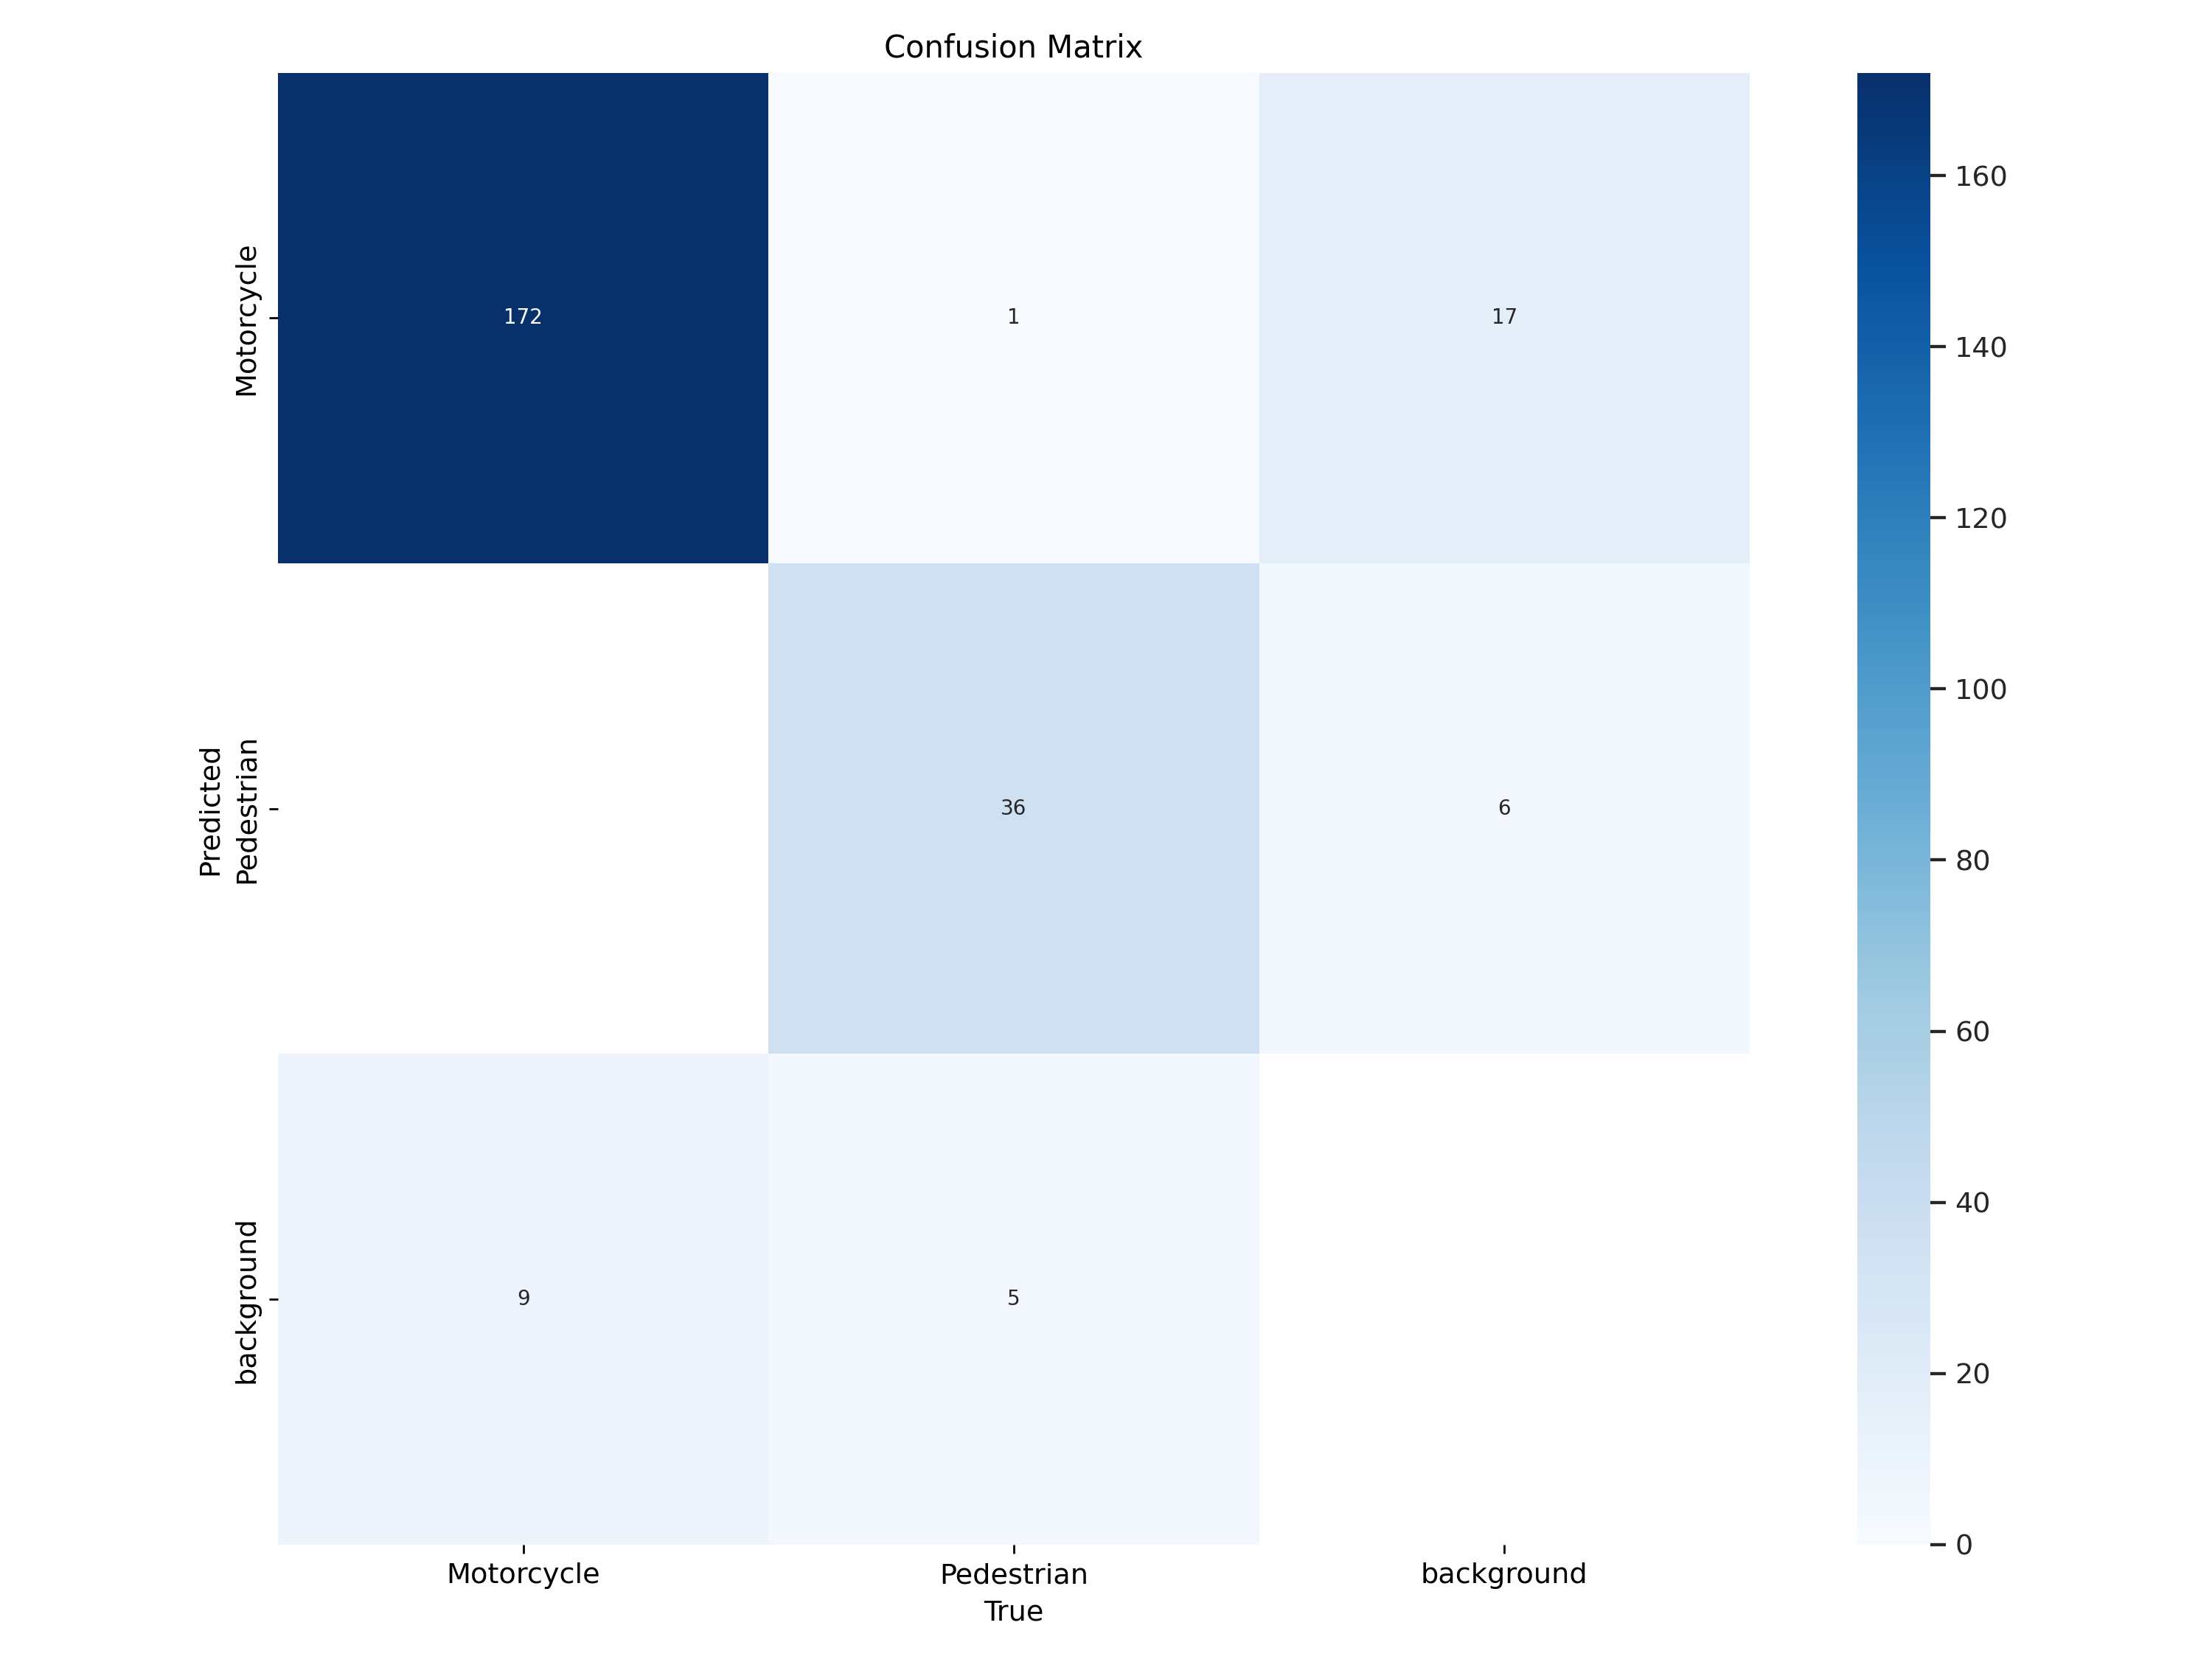

In [ ]:
Image(filename='/content/datasets/datasets/runs/detect/train/confusion_matrix.png', width=600)

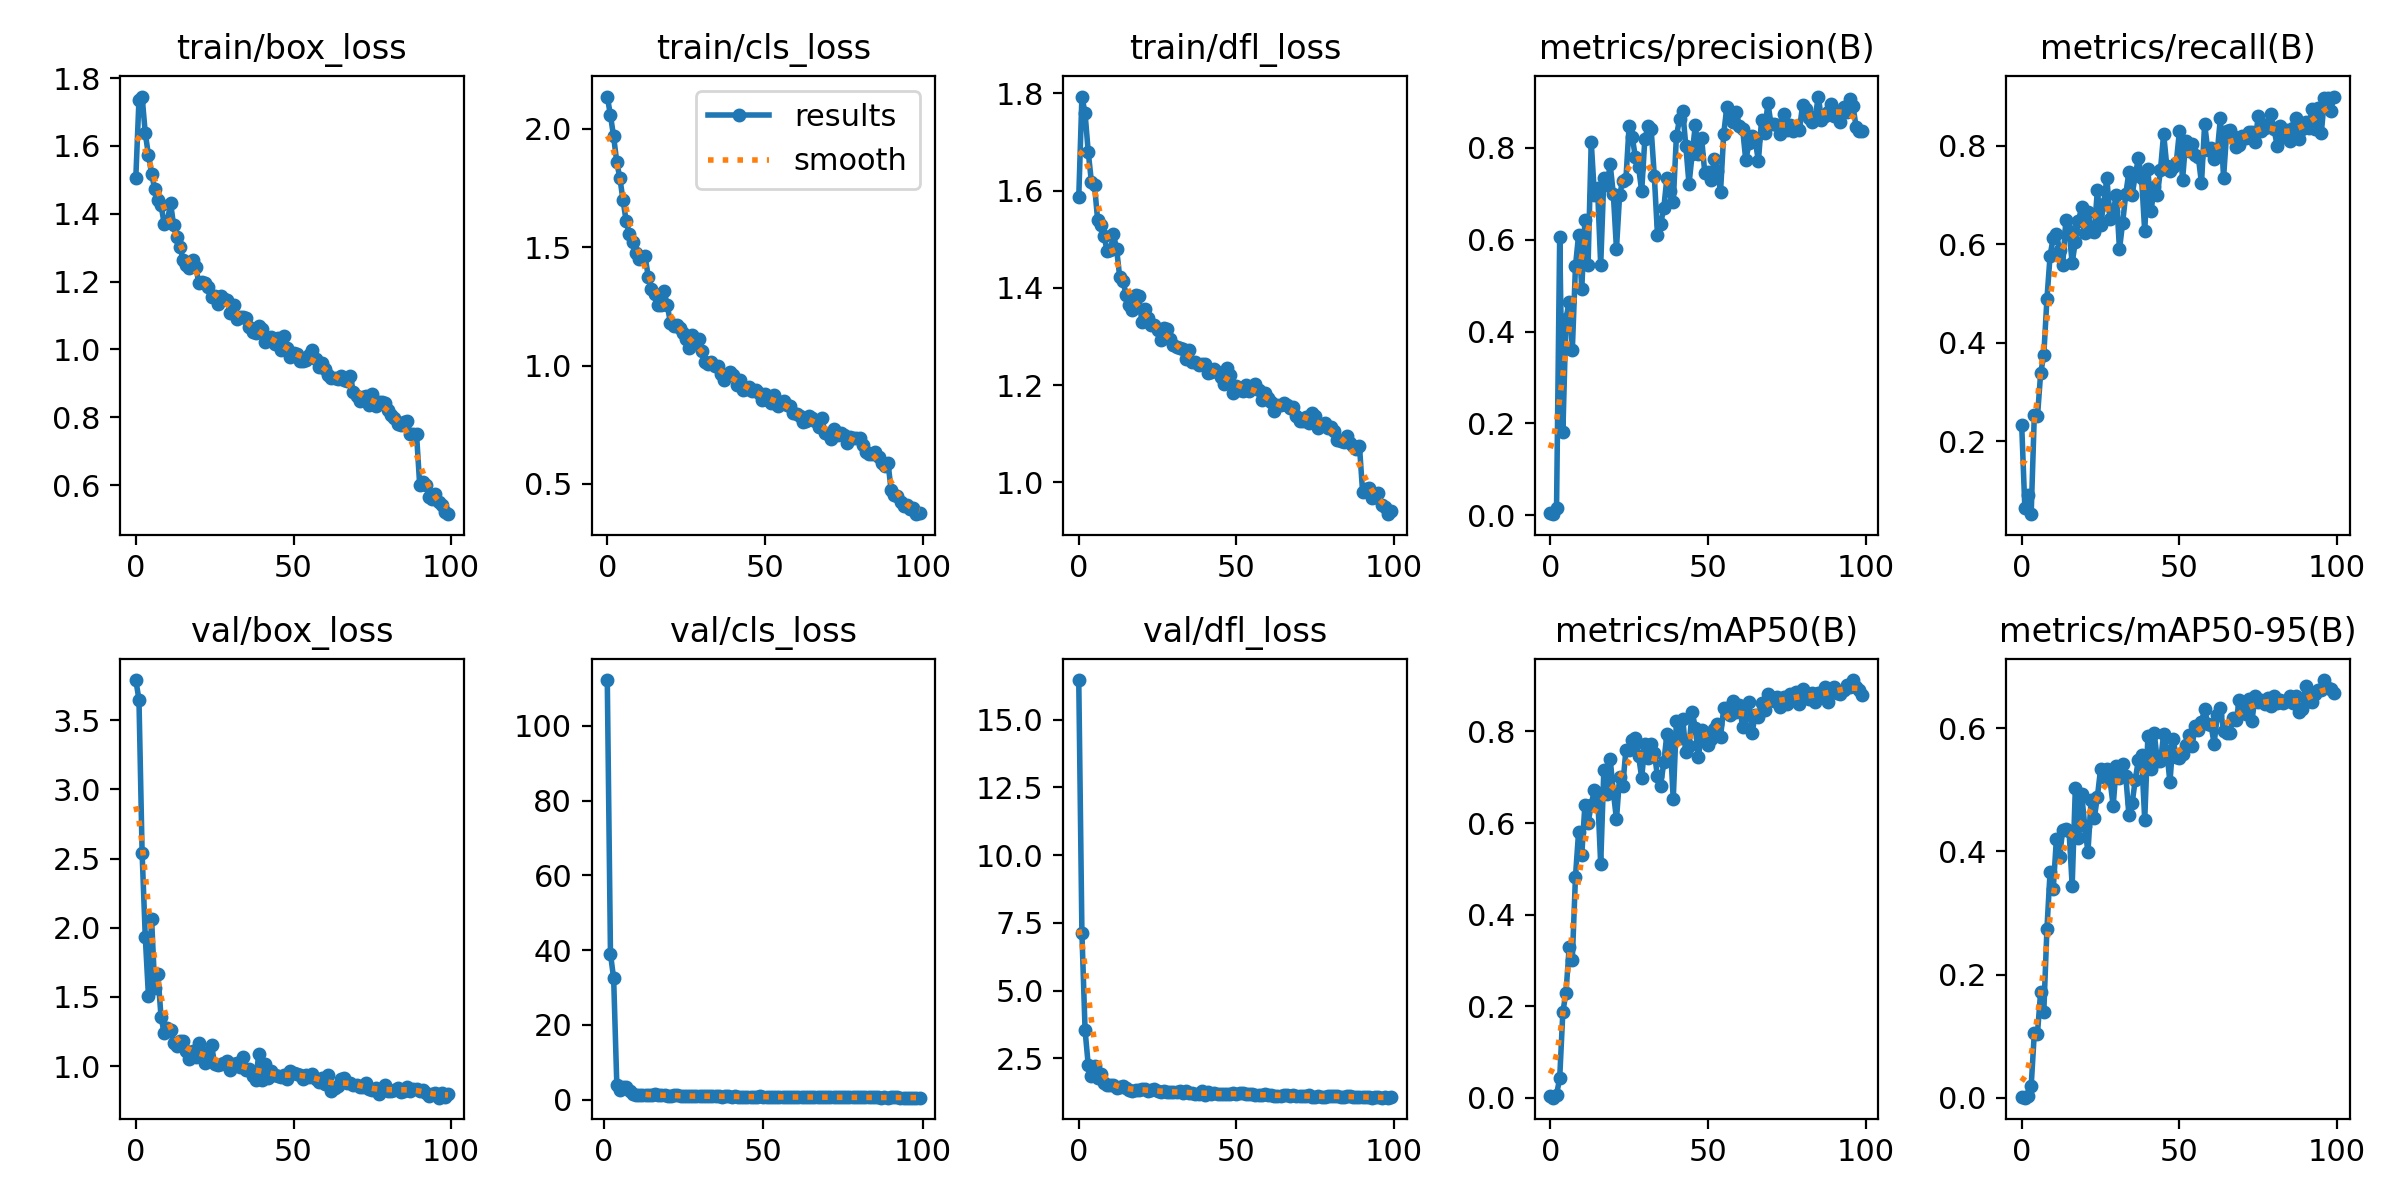

In [ ]:
Image(filename='/content/datasets/datasets/runs/detect/train/results.png', width=600)

In [ ]:
%cd /content/datasets/datasets
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=Nested-Object-Detection-5/data.yaml

/content/datasets/datasets
Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/datasets/datasets/Nested-Object-Detection-5/valid/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100% 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.46it/s]
                   all        119        223      0.891      0.896      0.912      0.679
            Motorcycle        119        181      0.905      0.945      0.959      0.812
            Pedestrian        119         42      0.877      0.848      0.866      0.546
Speed: 6.1ms preprocess, 7.0ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val5
